In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [35]:
dataset= fetch_lfw_people(min_faces_per_person=70, resize=0.4) 
X=dataset.data
y=dataset.target
target_names=dataset.target_names
images=dataset.images

In [36]:
n, h, w=images.shape
print(n)
print(h)
print(w)

1288
50
37


In [37]:
X.shape

(1288, 1850)

In [38]:
len(target_names)

7

In [39]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

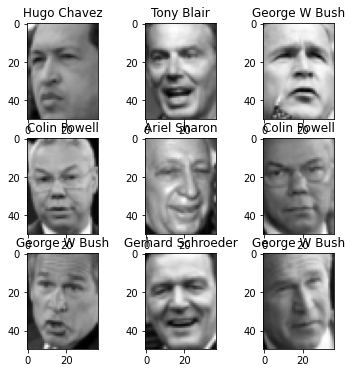

In [40]:
def plot_grid(images, titles, h,w, rows=3, cols=3):
    plt.figure(figsize=(2*cols,2*rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols, i+1)
        plt.imshow(images[i].reshape(h,w),cmap="gray")
        plt.title(target_names[titles[i]])
plot_grid(X,y,h,w)

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

In [42]:
X_train.shape

(1159, 1850)

In [75]:
pl=PCA(n_components=500)
pl.fit(X_train)

PCA(n_components=500)

In [76]:
X_train_trans_1=pl.transform(X_train)
X_test_trans_1=pl.transform(X_test)

In [77]:
X_train_trans_1.shape

(1159, 500)

In [78]:
clf=MLPClassifier(hidden_layer_sizes=(256,),batch_size=128, verbose=True, early_stopping=True)
clf.fit(X_train_trans_1, y_train)

Iteration 1, loss = 11.05503158
Validation score: 0.491379
Iteration 2, loss = 5.30378075
Validation score: 0.603448
Iteration 3, loss = 2.13528321
Validation score: 0.637931
Iteration 4, loss = 0.74645301
Validation score: 0.681034
Iteration 5, loss = 0.15947212
Validation score: 0.732759
Iteration 6, loss = 0.03977678
Validation score: 0.724138
Iteration 7, loss = 0.00240560
Validation score: 0.732759
Iteration 8, loss = 0.00020632
Validation score: 0.741379
Iteration 9, loss = 0.00018409
Validation score: 0.741379
Iteration 10, loss = 0.00017001
Validation score: 0.741379
Iteration 11, loss = 0.00016388
Validation score: 0.741379
Iteration 12, loss = 0.00016235
Validation score: 0.741379
Iteration 13, loss = 0.00016148
Validation score: 0.741379
Iteration 14, loss = 0.00016096
Validation score: 0.741379
Iteration 15, loss = 0.00016035
Validation score: 0.741379
Iteration 16, loss = 0.00015983
Validation score: 0.741379
Iteration 17, loss = 0.00015952
Validation score: 0.741379
Itera

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(256,),
              verbose=True)

In [79]:
y_pred= clf.predict(X_test_trans_1)
print (classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.40      0.50      0.44         4
     Colin Powell       0.77      0.77      0.77        22
  Donald Rumsfeld       0.67      0.75      0.71        16
    George W Bush       0.89      0.88      0.88        56
Gerhard Schroeder       0.50      0.50      0.50        10
      Hugo Chavez       0.67      0.67      0.67         6
       Tony Blair       0.69      0.60      0.64        15

         accuracy                           0.76       129
        macro avg       0.66      0.67      0.66       129
     weighted avg       0.76      0.76      0.76       129



In [80]:
p=PCA()
p.fit(X_train)

PCA()

In [81]:
p.transform(X_train).shape

(1159, 1159)